In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
# Reproducibility
np.random.seed(42)

# Sample size
n = 100

# Predictors
X1 = np.random.normal(0, 1, n)        # Normal predictor
X2 = np.random.uniform(-2, 2, n)      # Uniform predictor

In [9]:
# True relationship: Y = 3 + 2*X1 - 1*X2 + noise
beta0, beta1, beta2 = 3, 2, -1
noise = np.random.normal(0, 1, n)
Y = beta0 + beta1*X1 + beta2*X2 + noise

In [ ]:
# 2. Fit linear regression using statsmodels
X = np.column_stack((X1, X2))
X = sm.add_constant(X)  # add intercept
model = sm.OLS(Y, X).fit() #ordinary least squares regression

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     155.8
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           5.07e-31
Time:                        18:31:28   Log-Likelihood:                -150.44
No. Observations:                 100   AIC:                             306.9
Df Residuals:                      97   BIC:                             314.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0368      0.111     27.264      0.0

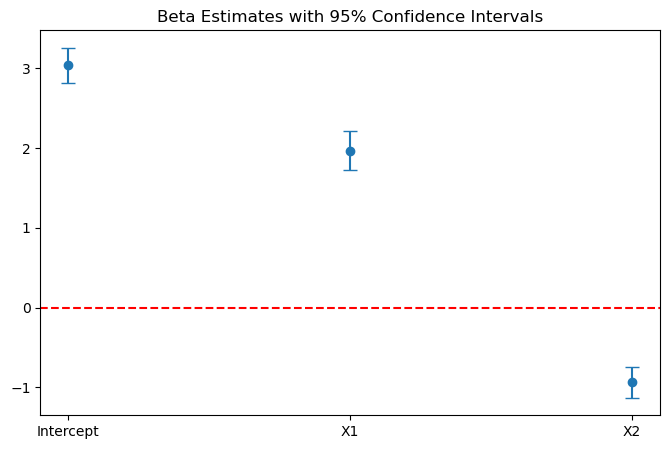

In [13]:
# 3. Plot confidence intervals for coefficients
conf_int = model.conf_int()
betas = model.params

lower_error = betas - conf_int[:, 0]  # difference between beta and lower CI
upper_error = conf_int[:, 1] - betas  # difference between upper CI and beta
yerr = [lower_error, upper_error]

plt.figure(figsize=(8,5))
plt.errorbar(range(len(betas)), betas, 
             yerr=yerr, 
             fmt='o', capsize=5)
plt.xticks(range(len(betas)), ['Intercept','X1','X2'])
plt.axhline(0, color='red', linestyle='--')
plt.title("Beta Estimates with 95% Confidence Intervals")
plt.show()